In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# X ~ Bin(x;N,p(theta)) : N 번 중 성공 횟수 X, 성공 확률 p

# cf) (Bern) Y ~ Bern(y;p(theta)) 

# { N! / x!*(N-x)! } * p^x * (1-p)^(N-x) 

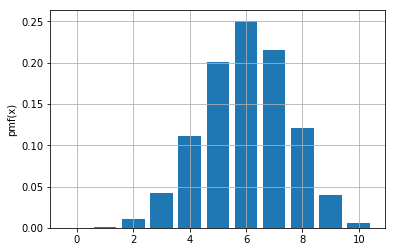

In [9]:
# Scipy 의 binom 클래스 이용 
# n , p

N = 10
p = 0.6

rv = sp.stats.binom(N,p)
xx = np.arange(N+1) # 0 부터 10

plt.bar(xx,rv.pmf(xx))
plt.ylabel("pmf(x)")
plt.grid(True)
plt.show()

In [10]:
# simulate using rvs

np.random.seed(0)
x = rv.rvs(100)
print(x)

[ 6  5  6  6  6  5  6  4  3  6  5  6  6  4  8  8  9  5  5  4  3  5  6  5
  8  5  8  4  6  6  7  5  6  6  9  6  6  6  4  5  7  6  5  8  5  5  7  8
  7  7  6  6  2  8  7  8  5  7  6  7  8  8  5  8  7  7  5  8  4  8  3  6
  3  6  5  9  7  8  7  8  7  6  8  5  6  7  6  8  6  4  7  5  8  5  7  7
  6  9  5 10]


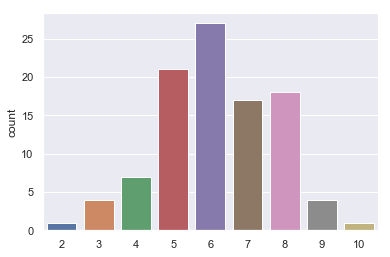

In [12]:
sns.set()
sns.set_style("darkgrid")
sns.countplot(x)
plt.show()

In [23]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df= pd.DataFrame({'theory':rv.pmf(xx), 'simulation':y}).stack()
df= df.reset_index()
df.columns = ['value','type','%']
df.pivot = ('value','type','%')
df

,value,type,%
0,0,theory,0.000105
1,0,simulation,0.000000
2,1,theory,0.001573
3,1,simulation,0.000000
4,2,theory,0.010617
5,2,simulation,0.010000
6,3,theory,0.042467
7,3,simulation,0.040000
8,4,theory,0.111477
9,4,simulation,0.070000


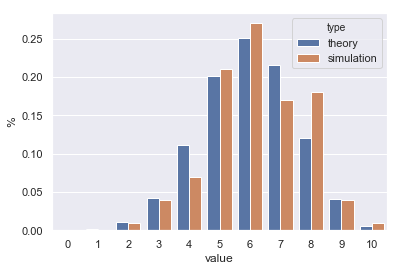

In [24]:
sns.barplot(x='value',y='%',hue='type',data=df)
plt.show()